<a href="https://colab.research.google.com/github/hoantran14/ANN/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
import numpy as np
from keras.utils import load_img, img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mping
from keras.models import load_model
from sklearn.model_selection import train_test_split
import os
from keras.preprocessing import image
import cv2 as cv
import tensorflow as tf
import pandas as pd
from keras.layers import Flatten
from PIL import Image



Epoch 1/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 50ms/step - accuracy: 0.4076 - loss: 1.6462 - val_accuracy: 0.6106 - val_loss: 1.1226
Epoch 2/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.6189 - loss: 1.0928 - val_accuracy: 0.6571 - val_loss: 0.9958
Epoch 3/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 0.6786 - loss: 0.9301 - val_accuracy: 0.6816 - val_loss: 0.9277
Epoch 4/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 51ms/step - accuracy: 0.7157 - loss: 0.8199 - val_accuracy: 0.6971 - val_loss: 0.8858
Epoch 5/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 49ms/step - accuracy: 0.7470 - loss: 0.7341 - val_accuracy: 0.6922 - val_loss: 0.8937
Epoch 6/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 49ms/step - accuracy: 0.7677 - loss: 0.6693 - val_accuracy: 0.6904 - val_loss: 0.9251
Epoch 7/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 49ms/step - accuracy: 0.7911 - loss: 0.5974 - val_accuracy: 0.7017 - val_loss: 0.9196
Epoch 8/100
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 49ms/step - accuracy: 

313/313 - 4s - 12ms/step - accuracy: 0.6619 - loss: 5.4078

Accuracy: 0.661899983882904
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step


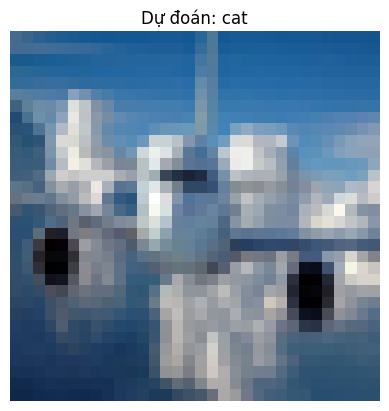

Dự đoán cho /content/airplane.jfif: cat
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


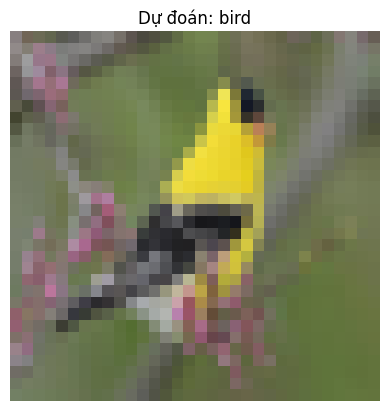

Dự đoán cho /content/bird.jfif: bird
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


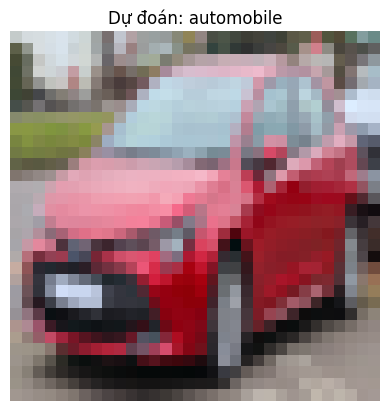

Dự đoán cho /content/car.jpg: automobile
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


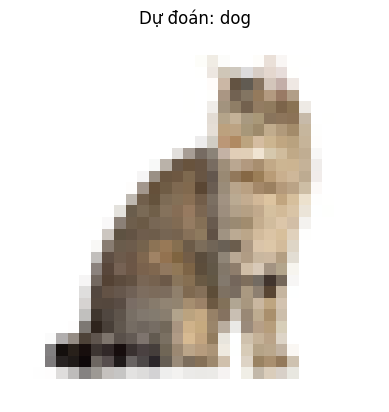

Dự đoán cho /content/cat.jfif: dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


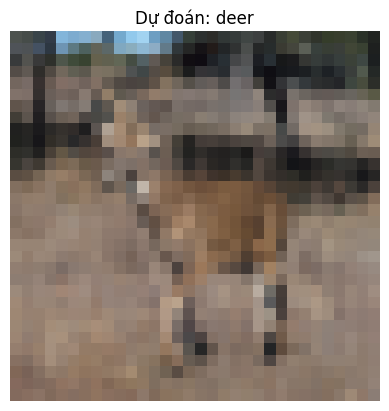

Dự đoán cho /content/deer.jpg: deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step


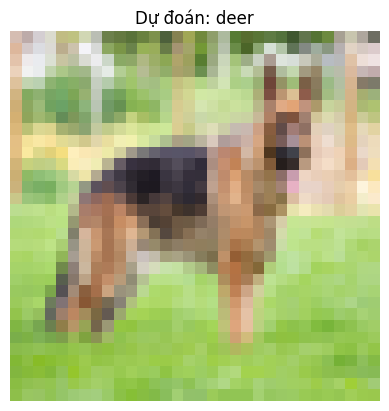

Dự đoán cho /content/dog.webp: deer
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


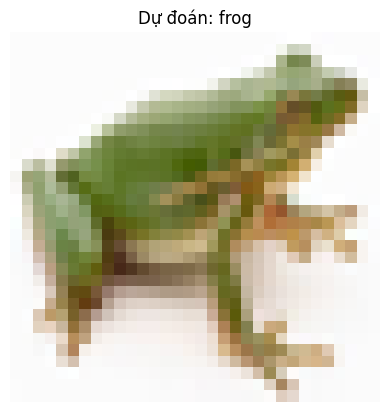

Dự đoán cho /content/frog.jfif: frog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


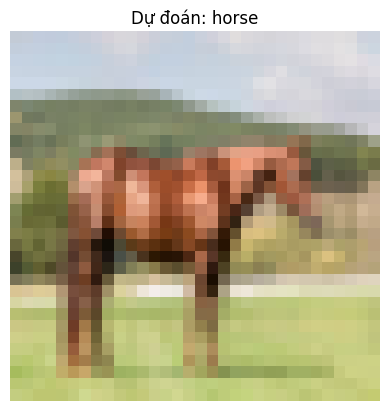

Dự đoán cho /content/horse.jfif: horse
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step


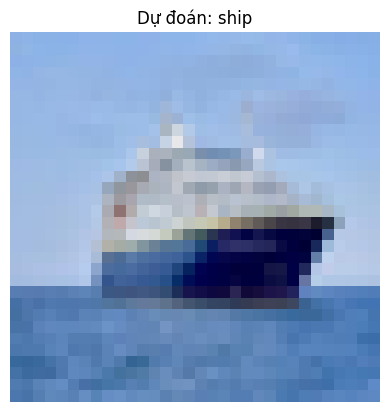

Dự đoán cho /content/ship.jfif: ship
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


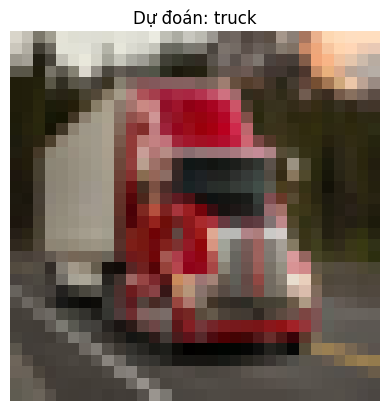

Dự đoán cho /content/truck.jfif: truck


In [4]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Tải dữ liệu CIFAR-10
cifar10 = tf.keras.datasets.cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Chuẩn hóa dữ liệu
train_images, test_images = train_images / 255.0, test_images / 255.0

# Tên các lớp
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Xây dựng mô hình
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Biên dịch mô hình
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Huấn luyện mô hình
model.fit(train_images, train_labels, epochs=100, validation_data=(test_images, test_labels))

# Lưu mô hình sau khi huấn luyện
model.save('cifar10_model.h5')

# Đánh giá mô hình
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nAccuracy:', test_acc)

# Dự đoán trên tập kiểm tra
predictions = model.predict(test_images)

# Hàm dự đoán cho hình ảnh bên ngoài
def predict_external_image(image_path):
    img = Image.open(image_path).resize((32, 32))  # Đổi kích thước ảnh
    img_array = np.array(img) / 255.0  # Chuẩn hóa ảnh
    img_array = img_array.reshape(1, 32, 32, 3)  # Định hình lại để phù hợp với mô hình
    prediction = model.predict(img_array)
    predicted_label = np.argmax(prediction)
    plt.imshow(img)
    plt.title(f"Dự đoán: {class_names[predicted_label]}")
    plt.axis('off')
    plt.show()
    return class_names[predicted_label]

# Ví dụ sử dụng với 10 hình ảnh bên ngoài
external_images = ['/content/airplane.jfif', '/content/bird.jfif', '/content/car.jpg', '/content/cat.jfif', '/content/deer.jpg',
                   '/content/dog.webp', '/content/frog.jfif', '/content/horse.jfif', '/content/ship.jfif', '/content/truck.jfif']

for image_path in external_images:
    result = predict_external_image(image_path)
    print(f"Dự đoán cho {image_path}: {result}")


